In [1]:
import pandas as pdLib
import matplotlib.pyplot as pltLib
import seaborn as snsLib
from sklearn.preprocessing import LabelEncoder as LabelEncoderLib , StandardScaler as StandardScalerLib
from imblearn.over_sampling import SMOTE as SMOTELib

from sklearn.linear_model import LogisticRegression as LogisticRegressionLib
from sklearn.ensemble import GradientBoostingClassifier as GradientBoostingClassifierLib
from sklearn.svm import SVC as SVCLib
from catboost import CatBoostClassifier as CatBoostClassifierLib
from sklearn.model_selection import train_test_split as train_test_split_Lib, cross_val_score as cross_val_score_Lib, StratifiedKFold as StratifiedKFoldLib


from pandas.plotting import andrews_curves as acs
from matplotlib.colors import LinearSegmentedColormap as clrLinMap

from sklearn.metrics import roc_curve as rocLibVal, auc as aucLibVal, confusion_matrix as conMXRSLib, classification_report as crRSLib, accuracy_score as acV

from sklearn.preprocessing import label_binarize as lbl_binLib
import numpy as npLib
import warnings as ignWarnLib
ignWarnLib.filterwarnings('ignore')





In [2]:
# 2. LOADING DATA
ldMLData = pdLib.read_csv('LiverDiseaseDataset.csv')

ldMLData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [3]:

ldMLData.drop(columns=['Unnamed: 0'], inplace=True)
# Checking any null values
print(ldMLData.isnull().sum())

# Transgorm 'Sex' column 
ldMLData['Sex'] = ldMLData['Sex'].map({'m': 0, 'f': 1})
ldMLData.fillna(ldMLData.median(numeric_only=True) ,inplace=True)
ldMLData.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

# EDA

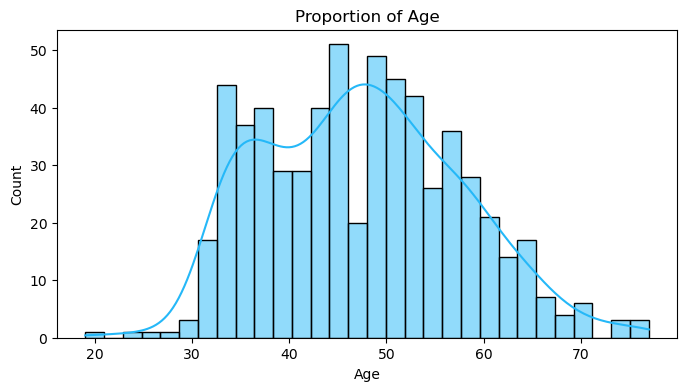

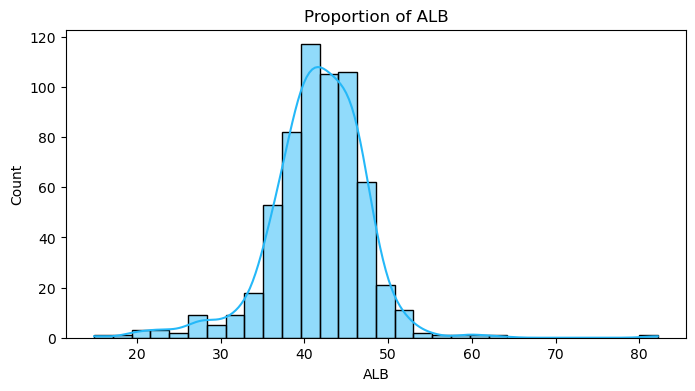

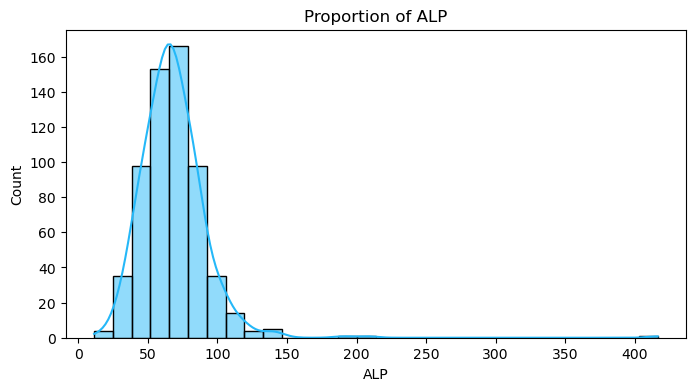

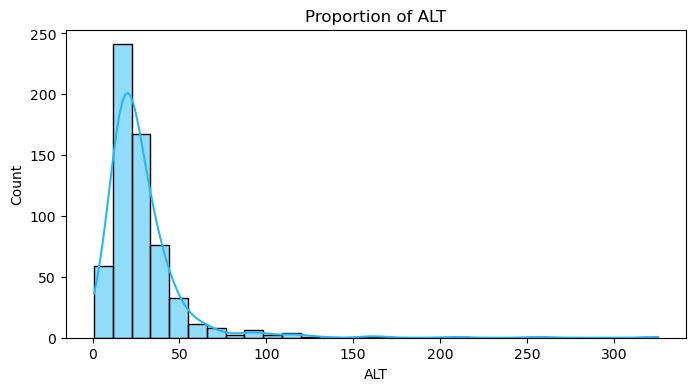

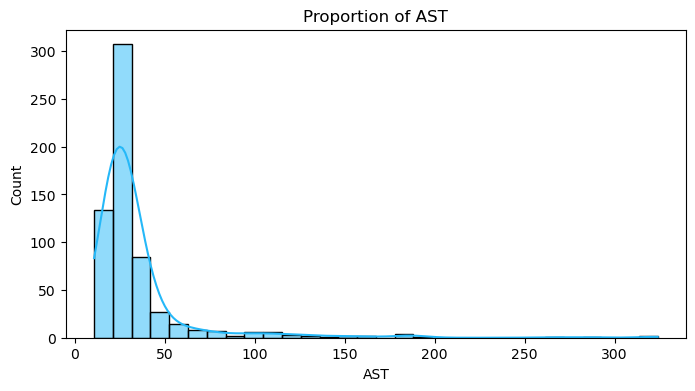

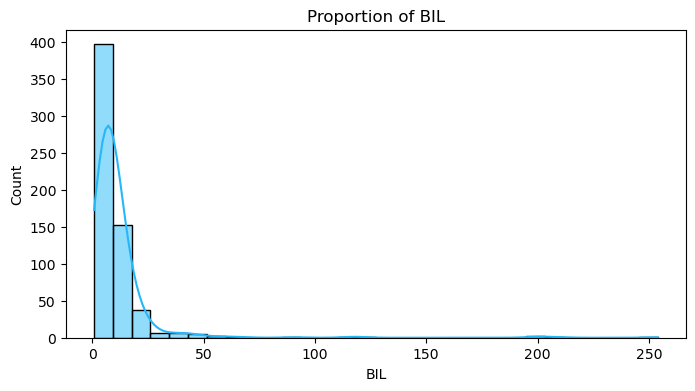

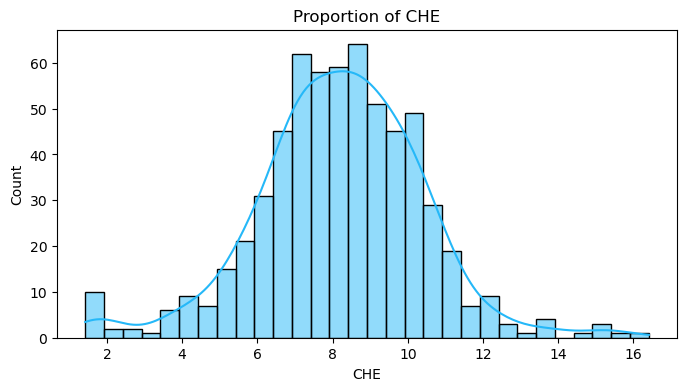

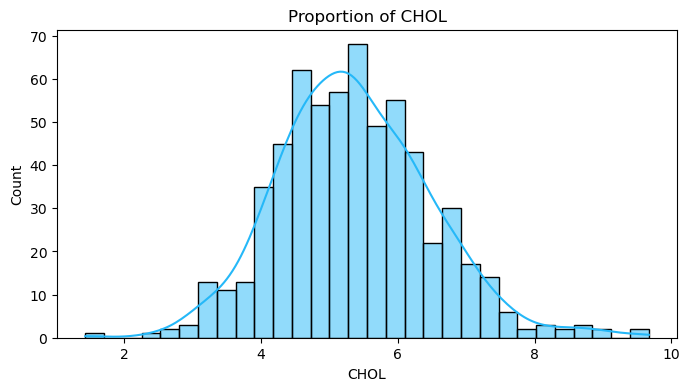

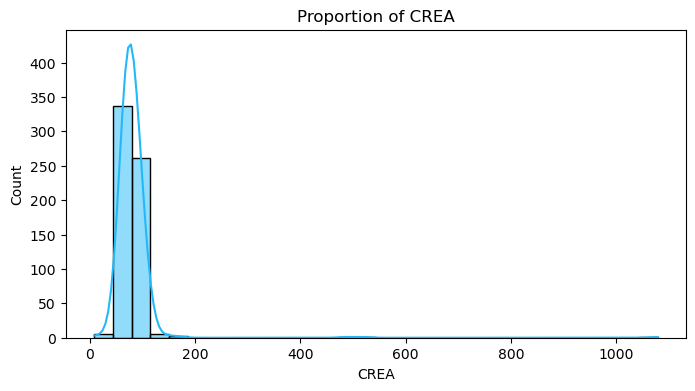

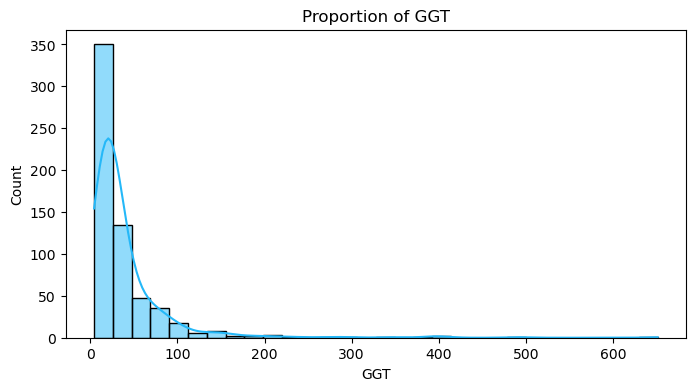

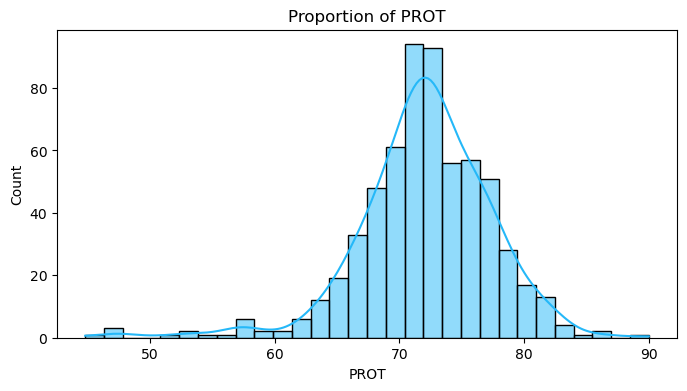

In [5]:
# 1. Every numerical column's value distribution

valueCols = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
# configuring a fixed color combo
lightBlueColor = '#25B8F8'
# Drawing histogram and setting KDE for each numeric feature
for i, eachColumn in enumerate(valueCols):
    pltLib.figure(figsize=(8, 4))
    snsLib.histplot(ldMLData[eachColumn], kde=True, bins=30, color=lightBlueColor)
    pltLib.title(f'Proportion of {eachColumn}')
    pltLib.xlabel(eachColumn)
    pltLib.ylabel('Count')
    pltLib.show()


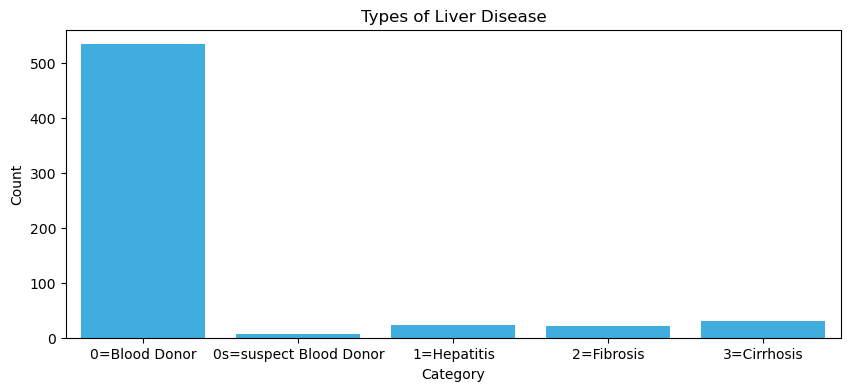

In [6]:
#2. Plot with single color for all bars
pltLib.figure(figsize=(10, 4))
snsLib.countplot(x='Category', data=ldMLData, color=lightBlueColor)
pltLib.title('Types of Liver Disease', color='black')
pltLib.xlabel('Category')
pltLib.ylabel('Count')
pltLib.show()

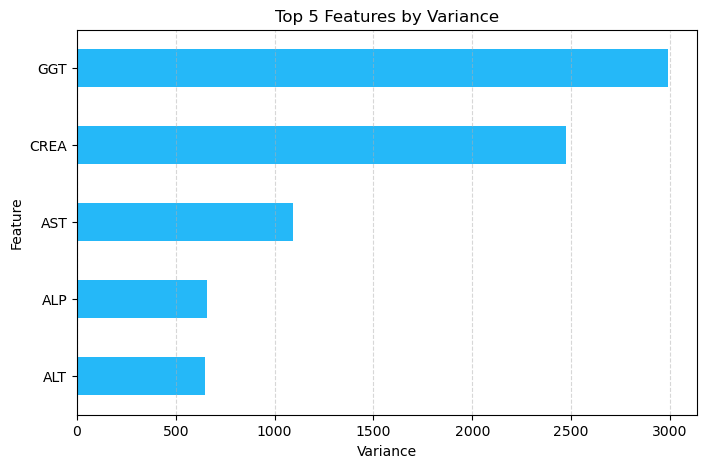

In [7]:
# 3. Finding top 5 features
ftVar = ldMLData[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].var()

# Sort and select top 5 variables
best5Fts = ftVar.sort_values(ascending=False).head(5)

# Plot with custom color as horizontal bar chart
pltLib.figure(figsize=(8,5))
best5Fts.plot(kind='barh', color='#25B8F8') 
pltLib.title('Top 5 Features by Variance', color='black')
pltLib.xlabel('Variance') 
pltLib.ylabel('Feature')
pltLib.gca().invert_yaxis() 
pltLib.grid(axis='x', linestyle='--', alpha=0.5)
pltLib.show()



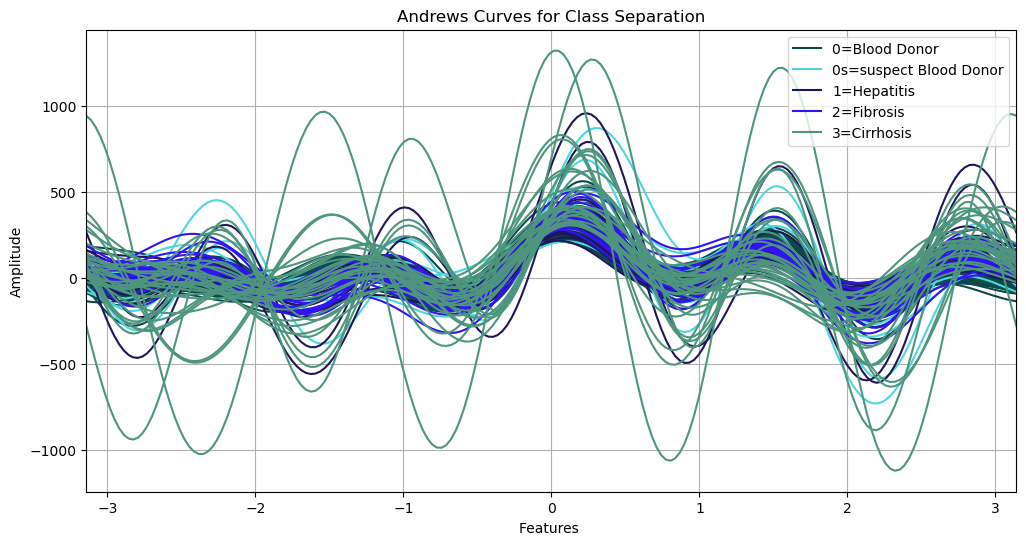

In [8]:

# 4. select numeric and target values
impColumns = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Category']

# manual color list 
custom_colors = ['#0B494B', '#4DD7DD', '#1F1659', '#3113F5', '#4D957D']

# displaying img
pltLib.figure(figsize=(12,6))
acs(ldMLData[impColumns], 'Category', color=custom_colors)
pltLib.title('Andrews Curves for Class Separation', color='black')
pltLib.xlabel('Features ')
pltLib.ylabel('Amplitude')
pltLib.show()


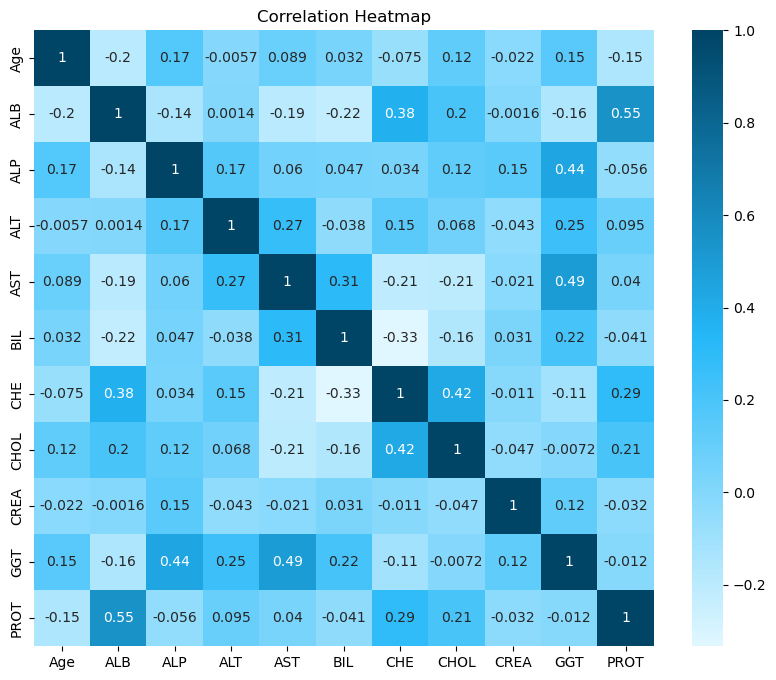

In [13]:

# 5, Correlations analysis
necessaryColumns = ldMLData.drop(columns=['Sex', 'Category'])
base_color = '#25B8F8'
colorCombo = clrLinMap.from_list('custom_blue', ['#E0F7FF', base_color, '#004466'])

pltLib.figure(figsize=(10,8))
snsLib.heatmap(necessaryColumns.corr(), annot=True, cmap=colorCombo)
pltLib.title('Correlation Heatmap')
pltLib.show()

# Pre-processing Continued

In [16]:
# Encode 'Category' using LabelEncoder
lblEncdrInit = LabelEncoderLib()
ldMLData['Category_encoded'] = lblEncdrInit.fit_transform(ldMLData['Category'])


# setting Features and Target columns
selFeatureCols = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
X = ldMLData[selFeatureCols]
y = ldMLData['Category_encoded']

# Scaling 
stdScalerInit = StandardScalerLib()
scaledDataX = stdScalerInit.fit_transform(X)

# applying smote to balance class
smtInit = SMOTELib(random_state=42)
smX, smY = smtInit.fit_resample(scaledDataX, y)

# 4. data splitting
X_train, X_test, y_train, y_test = train_test_split_Lib(smX, smY, test_size=0.2, random_state=42)


 Trained Model: LR
Testing Accuracy Score : 0.91


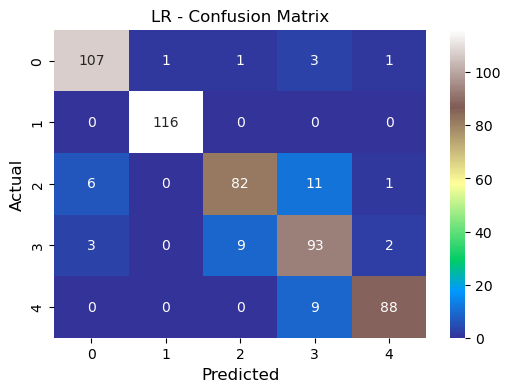


TP, TN, FP, FN for each class:
Class '0=Blood Donor': TP=107, TN=411, FP=9, FN=6
Class '0s=suspect Blood Donor': TP=116, TN=416, FP=1, FN=0
Class '1=Hepatitis': TP=82, TN=423, FP=10, FN=18
Class '2=Fibrosis': TP=93, TN=403, FP=23, FN=14
Class '3=Cirrhosis': TP=88, TN=432, FP=4, FN=9
Total Samples: 533

 Classification Report: LR
                        precision    recall  f1-score   support

         0=Blood Donor       0.92      0.95      0.93       113
0s=suspect Blood Donor       0.99      1.00      1.00       116
           1=Hepatitis       0.89      0.82      0.85       100
            2=Fibrosis       0.80      0.87      0.83       107
           3=Cirrhosis       0.96      0.91      0.93        97

              accuracy                           0.91       533
             macro avg       0.91      0.91      0.91       533
          weighted avg       0.91      0.91      0.91       533

LR - CV Accuracy: 0.91 (+/- 0.01)


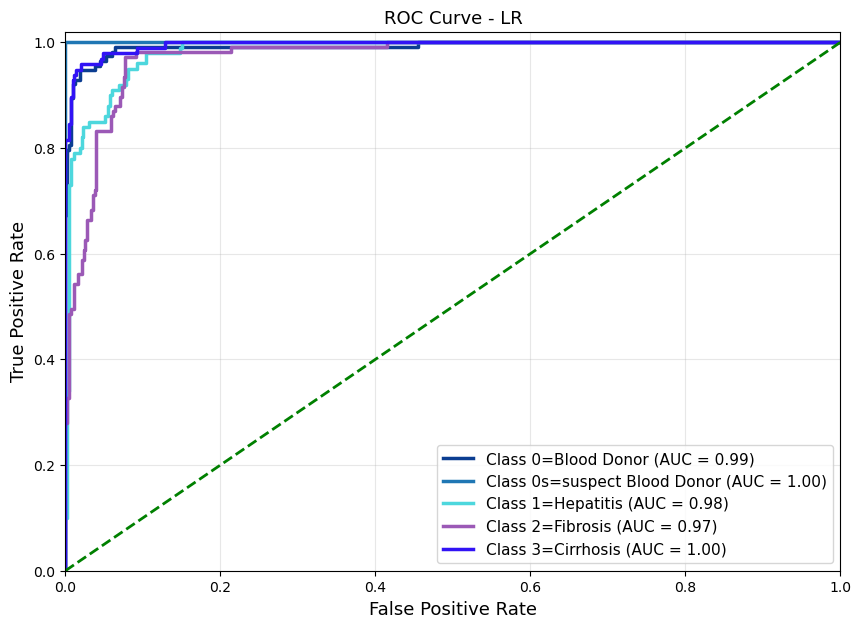


 Trained Model: SVM
Testing Accuracy Score : 0.96


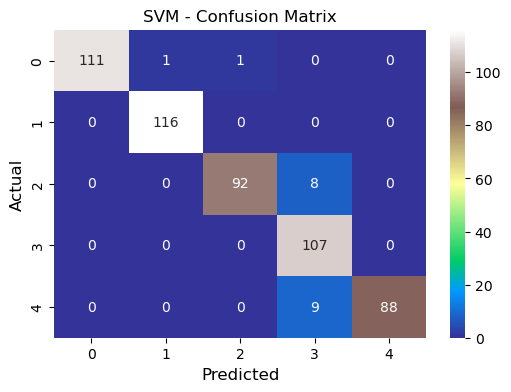


TP, TN, FP, FN for each class:
Class '0=Blood Donor': TP=111, TN=420, FP=0, FN=2
Class '0s=suspect Blood Donor': TP=116, TN=416, FP=1, FN=0
Class '1=Hepatitis': TP=92, TN=432, FP=1, FN=8
Class '2=Fibrosis': TP=107, TN=409, FP=17, FN=0
Class '3=Cirrhosis': TP=88, TN=436, FP=0, FN=9
Total Samples: 533

 Classification Report: SVM
                        precision    recall  f1-score   support

         0=Blood Donor       1.00      0.98      0.99       113
0s=suspect Blood Donor       0.99      1.00      1.00       116
           1=Hepatitis       0.99      0.92      0.95       100
            2=Fibrosis       0.86      1.00      0.93       107
           3=Cirrhosis       1.00      0.91      0.95        97

              accuracy                           0.96       533
             macro avg       0.97      0.96      0.96       533
          weighted avg       0.97      0.96      0.96       533

SVM - CV Accuracy: 0.97 (+/- 0.00)


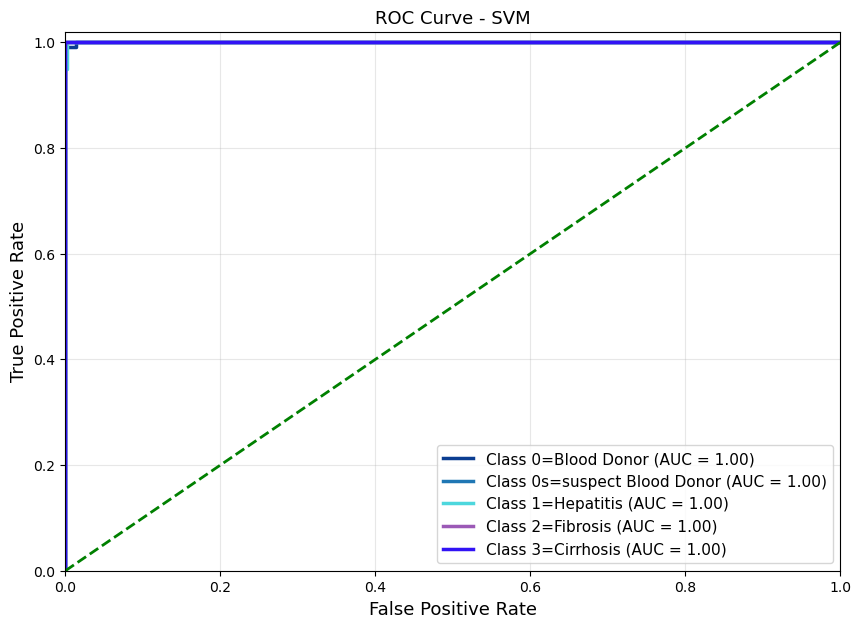


 Trained Model: GBM
Testing Accuracy Score : 1.00


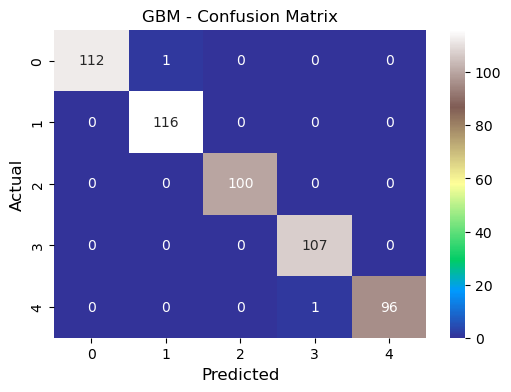


TP, TN, FP, FN for each class:
Class '0=Blood Donor': TP=112, TN=420, FP=0, FN=1
Class '0s=suspect Blood Donor': TP=116, TN=416, FP=1, FN=0
Class '1=Hepatitis': TP=100, TN=433, FP=0, FN=0
Class '2=Fibrosis': TP=107, TN=425, FP=1, FN=0
Class '3=Cirrhosis': TP=96, TN=436, FP=0, FN=1
Total Samples: 533

 Classification Report: GBM
                        precision    recall  f1-score   support

         0=Blood Donor       1.00      0.99      1.00       113
0s=suspect Blood Donor       0.99      1.00      1.00       116
           1=Hepatitis       1.00      1.00      1.00       100
            2=Fibrosis       0.99      1.00      1.00       107
           3=Cirrhosis       1.00      0.99      0.99        97

              accuracy                           1.00       533
             macro avg       1.00      1.00      1.00       533
          weighted avg       1.00      1.00      1.00       533

GBM - CV Accuracy: 0.99 (+/- 0.00)


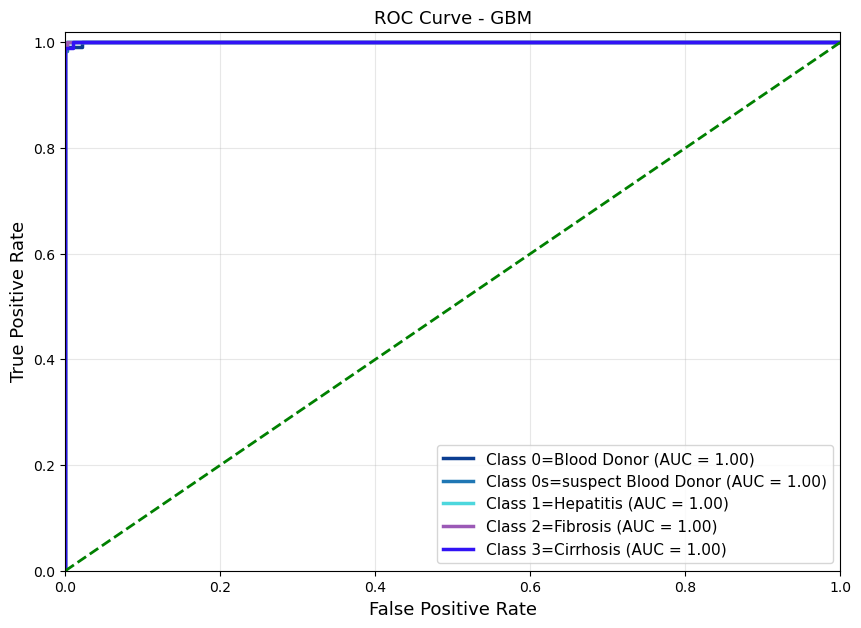

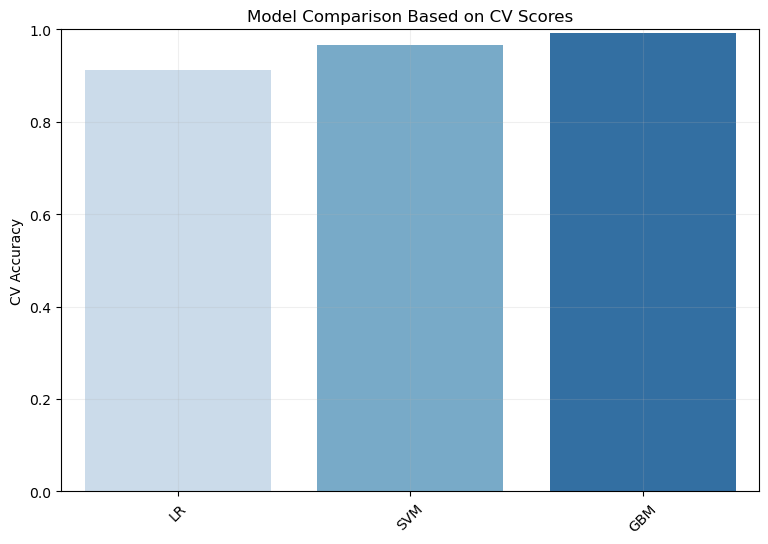

In [24]:

# 5. MODEL TRAINING AND CROSS-VALIDATION
proposedMlModels = {
    'LR': LogisticRegressionLib(max_iter=1000, solver='lbfgs', C=1.0),     
     'SVM': SVCLib(C=1.0, kernel='rbf', probability=True),
    'GBM': GradientBoostingClassifierLib(n_estimators=200, learning_rate=0.05, max_depth=4, subsample=0.8),
      
}

crsVal = StratifiedKFoldLib(n_splits=5, shuffle=True, random_state=42)

crsValRs = {}

# Binarize the output for ROC curve (needed for multiclass)
binzdRs = lbl_binLib(y_test, classes=npLib.unique(y_train))
numCls = binzdRs.shape[1]

for trainedmdlNm, eachModl in proposedMlModels.items():
    print(f"\n Trained Model: {trainedmdlNm}")
    eachModl.fit(X_train, y_train)
    mdlpredictionY = eachModl.predict(X_test)

    # Accuracy
    mdlPredAccuracyScore = acV(y_test, mdlpredictionY)
    print(f'Testing Accuracy Score : {mdlPredAccuracyScore:.2f}')

    # Confusion Matrix
    trainedMdlCM = conMXRSLib(y_test, mdlpredictionY)
    pltLib.figure(figsize=(6,4))
    snsLib.heatmap(trainedMdlCM, annot=True, fmt='d', cmap='terrain')
    pltLib.title(f'{trainedmdlNm} - Confusion Matrix', color='Black')
    pltLib.xlabel('Predicted', fontsize=12)
    pltLib.ylabel('Actual', fontsize=12)
    pltLib.show()

    # TP, TN, FP, FN (Multiclass version)
    print("\nTP, TN, FP, FN for each class:")
    for idx, label in enumerate(lblEncdrInit.classes_):
        TP = trainedMdlCM[idx, idx]
        FP = trainedMdlCM[:, idx].sum() - TP
        FN = trainedMdlCM[idx, :].sum() - TP
        TN = trainedMdlCM.sum() - (TP + FP + FN)
        print(f"Class '{label}': TP={TP}, TN={TN}, FP={FP}, FN={FN}")
    print(f"Total Samples: {trainedMdlCM.sum()}")

    # Classification Report
    print('\n Classification Report:', trainedmdlNm)
    print(crRSLib(y_test, mdlpredictionY, target_names=lblEncdrInit.classes_))

    # Cross-Validation
    crsValScr = cross_val_score_Lib(eachModl, smX, smY, cv=crsVal, scoring='accuracy')
    crsValRs[trainedmdlNm] = crsValScr.mean()
    print(f'{trainedmdlNm} - CV Accuracy: {crsValScr.mean():.2f} (+/- {crsValScr.std():.2f})')

    # ROC Curve (One vs Rest for Multiclass)
    if hasattr(eachModl, "predict_proba"):
        predProbScore = eachModl.predict_proba(X_test)
    else:
        predProbScore = eachModl.decision_function(X_test)

    fsPsRate = dict()
    tPsRate = dict()
    roc_auc = dict()

    for i in range(numCls):
        fsPsRate[i], tPsRate[i], _ = rocLibVal(binzdRs[:, i], predProbScore[:, i])
        roc_auc[i] = aucLibVal(fsPsRate[i], tPsRate[i])

    # Custom color palette
    rocClrs = ['#0B3D91', '#1F77B4', '#4DD7DD', '#9B59B6', '#3113F5']

    # Plot all ROC curves
    pltLib.figure(figsize=(10,7))
    for i in range(numCls):
        pltLib.plot(fsPsRate[i], tPsRate[i], color=rocClrs[i % len(rocClrs)],
                 lw=2.5, label=f'Class {lblEncdrInit.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

    # Diagonal reference line
    pltLib.plot([0, 1], [0, 1], linestyle='--', color='green', lw=2)

    pltLib.xlabel('False Positive Rate', fontsize=13)
    pltLib.ylabel('True Positive Rate', fontsize=13)
    pltLib.title(f'ROC Curve - {trainedmdlNm}', fontsize=13, color='black')
    pltLib.legend(loc='lower right', fontsize=11)
    pltLib.grid(alpha=0.3)
    pltLib.xlim([0.0, 1.0])
    pltLib.ylim([0.0, 1.02])
    pltLib.show()

# 6. CV Results Comparisons
pltLib.figure(figsize=(9,6))
snsLib.barplot(x=list(crsValRs.keys()), y=list(crsValRs.values()), palette='Blues')
pltLib.ylabel('CV Accuracy')
pltLib.title('Model Comparison Based on CV Scores', color='Black')
pltLib.xticks(rotation=45)
pltLib.ylim(0,1)
pltLib.grid(alpha=0.2)
pltLib.show()


In [26]:
optimalModelIdentified = max(crsValRs, key=crsValRs.get)
finalBestModel = proposedMlModels[optimalModelIdentified]

print(f"\nBest Model based on CV: {finalBestModel}")



Best Model based on CV: GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=200,
                           subsample=0.8)


In [28]:
# Save best model
import pickle as pcLibToSave
with open('optimalModl.pkl', 'wb') as f:
    pcLibToSave.dump(finalBestModel, f)

def resultPrediction(model, input_data):
    resultPredicted = model.predict([input_data])
    return resultPredicted[0]

with open('optimalModl.pkl', 'rb') as f:
    bstMdlLoaded = pcLibToSave.load(f)
    patientData = [48, 1, 81, 53, 9, 32, 8, 6, 13, 16, 83, 80]  
predictedResult = resultPrediction(bstMdlLoaded, patientData)
print(f'\nThe predicted category for the input data is: {predictedResult}')


The predicted category for the input data is: 2
